# Querying the structure pool for the Cs-Te binary system

_This example is reproducing the steps to create the initial structure pool for the high-throughput calculations published here: [doi:10.1063/5.0082710](https://doi.org/10.1063/5.0082710)._

As an initial data pool of crystal structures we use the [Materials Project (MP)](https://materialsproject.org) database and the [Open Quantum Materials database (OQMD)](https://oqmd.org/) that can be readily interfaced using the ``StructureImporter`` class of the library:

In [1]:
from aim2dat.strct import StructureImporter

strct_imp = StructureImporter()

## Querying crystals from Materials Project and Open Quantum Materials Database

The first argument for the queries consists of the chemical compositions specified via the string `'Cs-Te'`.

As for the MP database we query the initial structures (specified via the keyword `structure_type`) since these structures still have all symmetries. Additionally, an individual API key has to be passed to the function which can be requested at the MP webpage.

**Update:** The original interface to materials project via the pymatgen library is depreciated and will be removed soon. It is advised to use the open-api by setting the keyword argument ``use_openapi`` to ``True``.

In [2]:
import os

strct_imp.import_from_mp(
    "Cs-Te", "NiQf1wbOAEUJHo8H", structure_type="initial", use_openapi=False
)

/opt/hostedtoolcache/Python/3.10.15/x64/lib/python3.10/site-packages/pymatgen/ext/matproj_legacy.py:164: UserWarning: You are using the legacy MPRester. This version of the MPRester will no longer be updated. To access the latest data with the new MPRester, obtain a new API key from https://materialsproject.org/api and consult the docs at https://docs.materialsproject.org/ for more information.
  warnings.warn(


connected with Materials Project Version 2020_09_08.


/opt/hostedtoolcache/Python/3.10.15/x64/lib/python3.10/site-packages/pymatgen/ext/matproj_legacy.py:164: UserWarning: You are using the legacy MPRester. This version of the MPRester will no longer be updated. To access the latest data with the new MPRester, obtain a new API key from https://materialsproject.org/api and consult the docs at https://docs.materialsproject.org/ for more information.
  warnings.warn(


connected with Materials Project Version 2020_09_08.


/opt/hostedtoolcache/Python/3.10.15/x64/lib/python3.10/site-packages/pymatgen/ext/matproj_legacy.py:164: UserWarning: You are using the legacy MPRester. This version of the MPRester will no longer be updated. To access the latest data with the new MPRester, obtain a new API key from https://materialsproject.org/api and consult the docs at https://docs.materialsproject.org/ for more information.
  warnings.warn(


connected with Materials Project Version 2020_09_08.


In [3]:
strct_imp.import_from_oqmd("Cs-Te", query_limit=1000)

The downloaded crystals are stored in a ``StructureCollection`` object which can be accessed via the ``structures`` property. We can check the number of imported structures via `len` or by printing the object:

In [4]:
len(strct_imp.structures)

156

In [5]:
print(strct_imp)

----------------------------------------------------------------------
------------------------ Structure Collection ------------------------
----------------------------------------------------------------------

                          Imported from: mp                           
   - Number of structures: 32
   - Elements: Cs-Te

                         Imported from: oqmd                          
   - Number of structures: 124
   - Elements: Cs-Te

----------------------------------------------------------------------

                     Chemical element constraints                     
   Neglecting elemental structures: False

                     Chemical formula constraints                     
   Not set.

                        Attribute constraints                         
   Not set.

----------------------------------------------------------------------


Since we have been querying data from two different databases we might also want to check whether there are crystals shared by both databases.
In this case we use the F-fingerprint (<a href="https://doi.org/10.1063/1.3079326" target="_blank">doi:10.1063/1.3079326</a>) to identify duplicate structures. The function to indentify duplicate structures is implemented in the ``StructureOperations`` class.

We can simply pass the ``StructureCollection``](aiida_scripts.structure_analysis.StructureCollection) object from the ``StructureImporter`` to the ``StructureOperations`` object upon initialization:

In [6]:
from aim2dat.strct import StructureOperations

strct_op = StructureOperations(structures=strct_imp.structures)
strct_op.n_procs = 2
strct_op.cunksize = 500
strct_op.verbose = False

We use the ``find_duplicates_via_ffingerprint`` function to identify duplicate crystals, the function returns the labels of duplicate pairs and removes the first member of the pair from the ``StructureCollection`` object if `remove_structures` is set to `True`:

In [7]:
strct_op.find_duplicates_via_ffingerprint(
    remove_structures=True, 
    threshold=0.001, 
    r_max=15.0, 
    delta_bin=0.005, 
    sigma=10.0
)

[('OQMD_676192', 'mp_mp-1055940'),
 ('OQMD_676503', 'mp_mp-1055940'),
 ('OQMD_676504', 'mp_mp-1055940'),
 ('OQMD_621965', 'OQMD_620946'),
 ('OQMD_677954', 'OQMD_676288'),
 ('OQMD_1280348', 'OQMD_1215022'),
 ('OQMD_690486', 'OQMD_676083'),
 ('OQMD_675565', 'OQMD_675564'),
 ('OQMD_676082', 'OQMD_686178')]

Once again we can check the final number of structures:

In [8]:
len(strct_op.structures)

147

## Analysing the initial dataset

Having the duplicate structures removed we can split the dataset based on the crystal's source database:

In [9]:
structures_mp = strct_op.structures[:32]
structures_oqmd = strct_op.structures[32:]

We can get a better overview of on the crystals by exporting the data into a pandas dataframe for better visualization:

In [10]:
df_mp = structures_mp.create_pandas_df(
    exclude_columns=["functional", "icsd_ids", "magnetic_moment", "direct_band_gap"]
)
df_mp

,label,el_conc_Cs,el_conc_Te,nr_atoms,nr_atoms_Cs,nr_atoms_Te,source,source_id,space_group,formation_energy (eV/atom),stability (eV/atom)
0,mp_mp-1012110,1.000000,0.000000,4,4,0,MP_2020_09_08,mp-1012110,57,0.046335,0.046335
1,mp_mp-949029,1.000000,0.000000,8,8,0,MP_2020_09_08,mp-949029,223,0.046690,0.046690
2,mp_mp-1055940,1.000000,0.000000,1,1,0,MP_2020_09_08,mp-1055940,225,0.041371,0.041371
3,mp_mp-573579,1.000000,0.000000,8,8,0,MP_2020_09_08,mp-573579,64,0.053976,0.053976
4,mp_mp-639727,1.000000,0.000000,4,4,0,MP_2020_09_08,mp-639727,194,0.026213,0.026213
5,mp_mp-1183897,1.000000,0.000000,20,20,0,MP_2020_09_08,mp-1183897,213,0.038677,0.038677
6,mp_mp-672241,1.000000,0.000000,8,8,0,MP_2020_09_08,mp-672241,135,0.065470,0.065470
7,mp_mp-1,1.000000,0.000000,1,1,0,MP_2020_09_08,mp-1,229,0.038770,0.038770
8,mp_mp-11832,1.000000,0.000000,2,2,0,MP_2020_09_08,mp-11832,194,0.035109,0.035109
9,mp_mp-1096915,1.000000,0.000000,1,1,0,MP_2020_09_08,mp-1096915,12,0.042218,0.042218


In [11]:
df_oqmd = structures_oqmd.create_pandas_df(
    exclude_columns=["functional", "icsd_ids", "magnetic_moment", "direct_band_gap"]
)

The dataset can be analyzed in more detail using the ``PhasePlot`` object from the ``plot`` sub-package of the library:

In [12]:
from aim2dat.plots import PhasePlot

Here we use the matplotlib-library to create the plots, interactive plots can also be generated by changing the ``backend`` to `"plotly"`:

In [13]:
phase_diagram = PhasePlot()
phase_diagram.ratio = (9, 4.5)
phase_diagram.show_crystal_system = True
phase_diagram.show_legend = True
phase_diagram.legend_bbox_to_anchor = (1.35, 1.0)
phase_diagram.backend = "matplotlib"

Chemical composition and formation energies can be readily parsed from the pandas data frames:

In [14]:
phase_diagram.import_from_pandas_df("MP", df_mp)
phase_diagram.import_from_pandas_df("OQMD", df_oqmd)

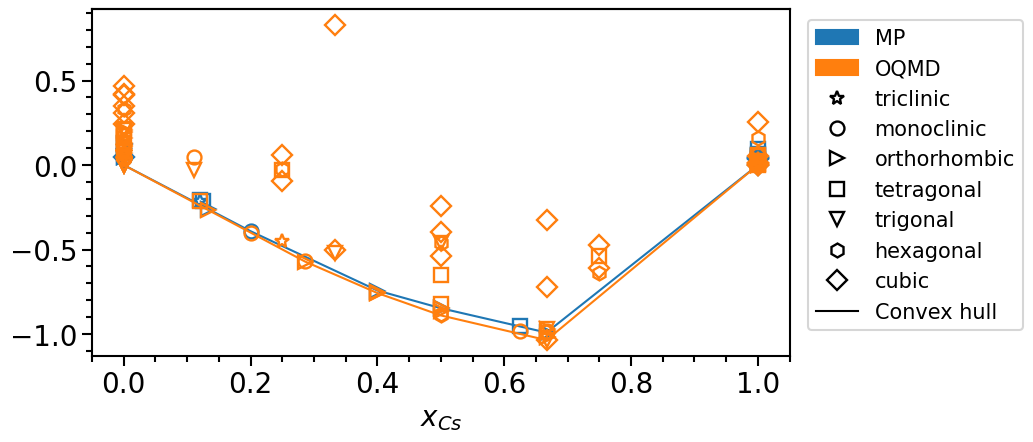

In [15]:
phase_diagram.plot_type = "scatter"
phase_diagram.plot_property = "formation_energy"
phase_diagram.plot(["MP", "OQMD"])

The stability is defined as the vertical distance of a phase with respect to the convex hull:

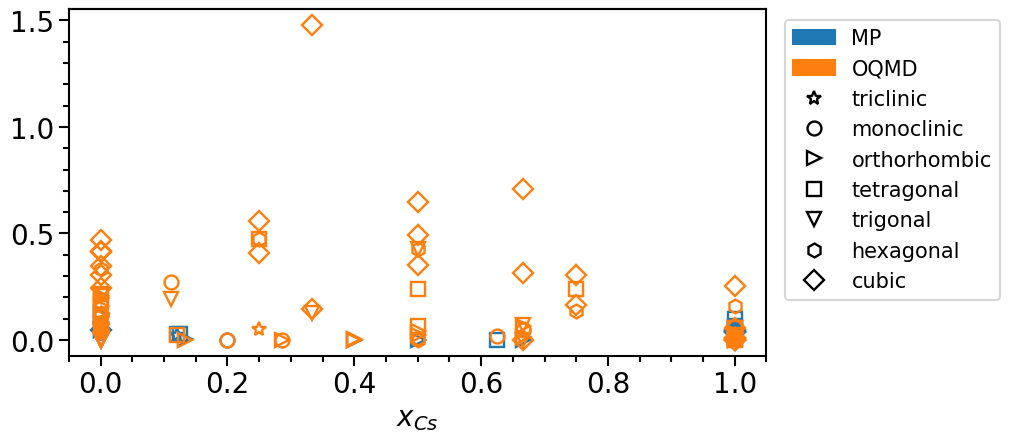

In [16]:
phase_diagram.plot_property = "stability"
phase_diagram.show_convex_hull = False
phase_diagram.plot(["MP", "OQMD"])

To analyze the distribution of the phases in their chemical configuration space we can plot a histogram of the total number of phases per concentration interval and crystal system:

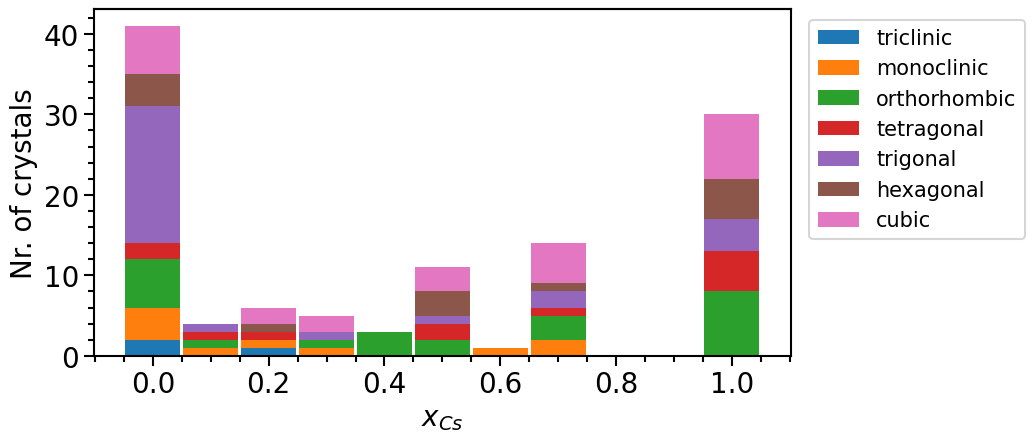

In [17]:
phase_diagram.plot_type = "numbers"
phase_diagram.y_label = "Nr. of crystals"
phase_diagram.plot(["MP", "OQMD"])

## Exploiting chemical similarity to increase the structure pool

From the last plot it is noticeable that more than two thirds of the structures actually represent elemental phases.
This imbalance is due to the fact that most structures in online databases have been determined experimentally.
Thus, we often find that the chemical space (in this case the mixed phases) relevant is under-represented in the dataset because it is easier to experimentally analyze "simple" compounds.

One way to counteract this trend is to make use of the chemical similarity of cations or anions and also query structures containing of ions having the same oxidation state as the target system. The ions can then be replaced in a second step, thus obtaining a larger variety of structures.
To do so, we import new structures once again.
However, this time we exclude elemental phases straight-away by setting the corresponding constraint:

In [18]:
strct_imp = StructureImporter()
strct_imp.neglect_elemental_structures = True

In [19]:
strct_imp.import_from_mp(
    ["K-Te", "Rb-Te", "K-Se", "Rb-Se", "Cs-Se", "K-Po", "Rb-Po", "Cs-Po"],
    "NiQf1wbOAEUJHo8H",
    structure_type="initial",
    use_openapi=False,
)

/opt/hostedtoolcache/Python/3.10.15/x64/lib/python3.10/site-packages/pymatgen/ext/matproj_legacy.py:164: UserWarning: You are using the legacy MPRester. This version of the MPRester will no longer be updated. To access the latest data with the new MPRester, obtain a new API key from https://materialsproject.org/api and consult the docs at https://docs.materialsproject.org/ for more information.
  warnings.warn(


connected with Materials Project Version 2020_09_08.


/opt/hostedtoolcache/Python/3.10.15/x64/lib/python3.10/site-packages/pymatgen/ext/matproj_legacy.py:164: UserWarning: You are using the legacy MPRester. This version of the MPRester will no longer be updated. To access the latest data with the new MPRester, obtain a new API key from https://materialsproject.org/api and consult the docs at https://docs.materialsproject.org/ for more information.
  warnings.warn(


connected with Materials Project Version 2020_09_08.


/opt/hostedtoolcache/Python/3.10.15/x64/lib/python3.10/site-packages/pymatgen/ext/matproj_legacy.py:164: UserWarning: You are using the legacy MPRester. This version of the MPRester will no longer be updated. To access the latest data with the new MPRester, obtain a new API key from https://materialsproject.org/api and consult the docs at https://docs.materialsproject.org/ for more information.
  warnings.warn(


connected with Materials Project Version 2020_09_08.


/opt/hostedtoolcache/Python/3.10.15/x64/lib/python3.10/site-packages/pymatgen/ext/matproj_legacy.py:164: UserWarning: You are using the legacy MPRester. This version of the MPRester will no longer be updated. To access the latest data with the new MPRester, obtain a new API key from https://materialsproject.org/api and consult the docs at https://docs.materialsproject.org/ for more information.
  warnings.warn(


connected with Materials Project Version 2020_09_08.


/opt/hostedtoolcache/Python/3.10.15/x64/lib/python3.10/site-packages/pymatgen/ext/matproj_legacy.py:164: UserWarning: You are using the legacy MPRester. This version of the MPRester will no longer be updated. To access the latest data with the new MPRester, obtain a new API key from https://materialsproject.org/api and consult the docs at https://docs.materialsproject.org/ for more information.
  warnings.warn(


connected with Materials Project Version 2020_09_08.


/opt/hostedtoolcache/Python/3.10.15/x64/lib/python3.10/site-packages/pymatgen/ext/matproj_legacy.py:164: UserWarning: You are using the legacy MPRester. This version of the MPRester will no longer be updated. To access the latest data with the new MPRester, obtain a new API key from https://materialsproject.org/api and consult the docs at https://docs.materialsproject.org/ for more information.
  warnings.warn(


connected with Materials Project Version 2020_09_08.


/opt/hostedtoolcache/Python/3.10.15/x64/lib/python3.10/site-packages/pymatgen/ext/matproj_legacy.py:164: UserWarning: You are using the legacy MPRester. This version of the MPRester will no longer be updated. To access the latest data with the new MPRester, obtain a new API key from https://materialsproject.org/api and consult the docs at https://docs.materialsproject.org/ for more information.
  warnings.warn(


connected with Materials Project Version 2020_09_08.


/opt/hostedtoolcache/Python/3.10.15/x64/lib/python3.10/site-packages/pymatgen/ext/matproj_legacy.py:164: UserWarning: You are using the legacy MPRester. This version of the MPRester will no longer be updated. To access the latest data with the new MPRester, obtain a new API key from https://materialsproject.org/api and consult the docs at https://docs.materialsproject.org/ for more information.
  warnings.warn(


connected with Materials Project Version 2020_09_08.


In [20]:
strct_imp.import_from_oqmd(
    ["K-Te", "Rb-Te", "K-Se", "Rb-Se", "Cs-Se", "K-Po", "Rb-Po", "Cs-Po"], query_limit=1000
)

Now we can substitute the elements in ``StructureOperations`` object accordingly:

In [21]:
strct_op.structures = strct_imp.structures
structures_subst = strct_op[strct_op.structures.labels].substitute_elements(
    [("K", "Cs"), ("Rb", "Cs"), ("Se", "Te"), ("Po", "Te")],
    change_label=True,
)

Since we have now probably have quite a few duplicate structures we will try to remove them. This time, however, we use a less strict method to filter out structures that are likely to be duplicates of others using merely the composition and the space group as criteria.

**Note:** In order to reduce the run time, we only take the first 50 crystals for this example.

We can choose to restrict the method merely on the newly imported structures where we substituted the elements by using the `confined` keyword, thus keeping all the previous phases in our dataset and applying the tight constraint only on the newly created phases:

In [22]:
strct_op.structures = structures_mp + structures_oqmd + structures_subst[:50]
strct_op.find_duplicates_via_comp_sym(remove_structures=True, confined=(133, 133 + 50))

spglib: No point group was found (line 405, /project/src/pointgroup.c).
spglib: Attempt 0 tolerance = 5.000000e-03 failed(line 800, /project/src/spacegroup.c).
spglib: No point group was found (line 405, /project/src/pointgroup.c).
spglib: Attempt 1 tolerance = 4.750000e-03 failed(line 800, /project/src/spacegroup.c).
spglib: No point group was found (line 405, /project/src/pointgroup.c).
spglib: Attempt 2 tolerance = 4.512500e-03 failed(line 800, /project/src/spacegroup.c).
spglib: No point group was found (line 405, /project/src/pointgroup.c).
spglib: Attempt 3 tolerance = 4.286875e-03 failed(line 800, /project/src/spacegroup.c).
spglib: No point group was found (line 405, /project/src/pointgroup.c).
spglib: Attempt 4 tolerance = 4.072531e-03 failed(line 800, /project/src/spacegroup.c).
spglib: No point group was found (line 405, /project/src/pointgroup.c).
spglib: Attempt 5 tolerance = 3.868905e-03 failed(line 800, /project/src/spacegroup.c).
spglib: No point group was found (line 4

spglib: No point group was found (line 405, /project/src/pointgroup.c).
spglib: Attempt 0 tolerance = 5.000000e-03 failed(line 800, /project/src/spacegroup.c).
spglib: No point group was found (line 405, /project/src/pointgroup.c).
spglib: Attempt 1 tolerance = 4.750000e-03 failed(line 800, /project/src/spacegroup.c).
spglib: No point group was found (line 405, /project/src/pointgroup.c).
spglib: Attempt 2 tolerance = 4.512500e-03 failed(line 800, /project/src/spacegroup.c).
spglib: No point group was found (line 405, /project/src/pointgroup.c).
spglib: Attempt 3 tolerance = 4.286875e-03 failed(line 800, /project/src/spacegroup.c).
spglib: No point group was found (line 405, /project/src/pointgroup.c).
spglib: Attempt 4 tolerance = 4.072531e-03 failed(line 800, /project/src/spacegroup.c).
spglib: No point group was found (line 405, /project/src/pointgroup.c).
spglib: Attempt 5 tolerance = 3.868905e-03 failed(line 800, /project/src/spacegroup.c).
spglib: No point group was found (line 4

[('mp_mp-8360_subst-RbCs', 'mp_mp-8361'),
 ('mp_mp-568745_subst-RbCs', 'mp_mp-573763'),
 ('mp_mp-1397_subst-RbCs', 'mp_mp-573763'),
 ('mp_mp-1011696_subst-SeTe', 'mp_mp-573763'),
 ('OQMD_647134', 'mp_mp-505634'),
 ('mp_mp-7670_subst-KCs-SeTe', 'mp_mp-505634'),
 ('mp_mp-7447_subst-RbCs-SeTe', 'mp_mp-505634'),
 ('mp_mp-644_subst-KCs', 'mp_mp-1188281'),
 ('mp_mp-755633_subst-KCs-SeTe', 'mp_mp-1188281'),
 ('mp_mp-1009489_subst-RbCs', 'OQMD_1104417'),
 ('mp_mp-1059621_subst-KCs-SeTe', 'OQMD_1104417'),
 ('mp_mp-1061530_subst-RbCs-SeTe', 'OQMD_1104417'),
 ('mp_mp-1009491_subst-RbCs', 'OQMD_1222159'),
 ('OQMD_1593007', 'OQMD_1239241'),
 ('mp_mp-1747_subst-KCs', 'OQMD_1343671'),
 ('mp_mp-441_subst-RbCs', 'OQMD_1343671'),
 ('mp_mp-8426_subst-KCs-SeTe', 'OQMD_1343671'),
 ('mp_mp-11327_subst-RbCs-SeTe', 'OQMD_1343671'),
 ('mp_mp-1011695_subst-SeTe', 'OQMD_1343671'),
 ('mp_mp-31002_subst-RbCs', 'OQMD_1800027'),
 ('mp_mp-2095_subst-RbCs', 'mp_mp-7289_subst-KCs'),
 ('mp_mp-9064_subst-RbCs', 'mp_mp-15

And now we can add the new structures to our plot object:

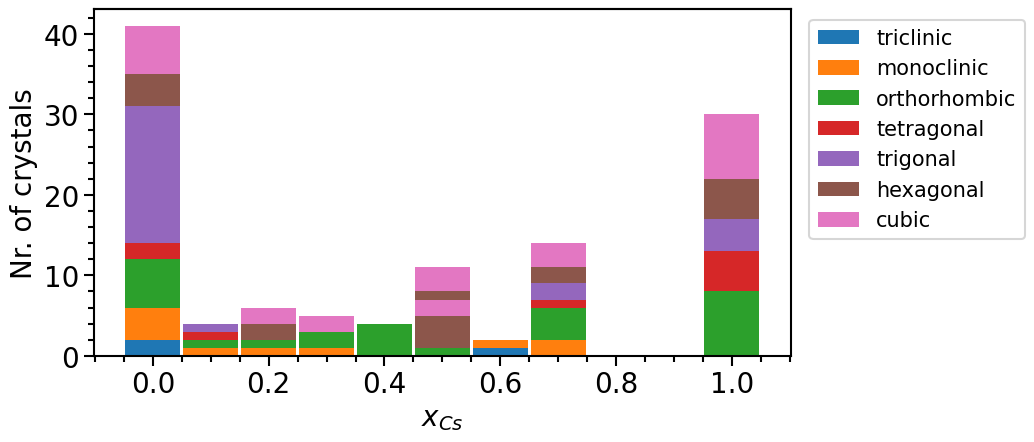

In [23]:
subst_structures = strct_op.structures[133:]
df_subst = subst_structures.create_pandas_df(
    exclude_columns=["functional", "icsd_ids", "magnetic_moment", "direct_band_gap"]
)
df_subst
phase_diagram.import_from_pandas_df("subst. structures", df_subst)
phase_diagram.plot(["MP", "OQMD", "subst. structures"])

We can clearly see that the number of mixed phases is larger in the new data pool.